## TP3 Statistiques inférentielles : estimation

- HUARD Titouan
- LYSEE Nicolas

On commence par importer les modules python nécessaires pour la suite de TP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
from scipy.stats import binom

# Exo 1: Simulation Loi de Bernouilli

No handles with labels found to put in legend.


La valeur de p estimé est pour 100 tirages independants pestim=  0.45


La valeur réelle de p est p=  0.42943441102391167


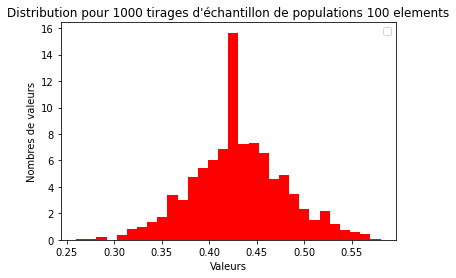

In [2]:
##n personnes au hasard Xi=1 si A Xi=0 si B
##Xi suit une loi de bernouilli de paramaetre p inconnu.
p=np.random.uniform(0,1)
n=100 ##taille echantillon >30 docn X barre suit une loi normale

Echantillon=np.random.binomial(1,p,n) #1 car on fais des tirages independants
pestim=np.mean(Echantillon)
print("La valeur de p estimé est pour 100 tirages independants pestim= ",pestim)
print("\n")
print("La valeur réelle de p est p= ",p)

##On repete le meme process pour 1000 echantillons de n=100 tirages
F=[]
for i in range (0,1000):
    F.append(np.mean(np.random.binomial(1,p,n)))
papprox=np.mean(F)


plt.figure()
plt.hist(F,bins=30,density=1,color='r')
plt.title("Distribution pour 1000 tirages d'échantillon de populations 100 elements")
plt.xlabel("Valeurs")
plt.ylabel("Nombres de valeurs")
plt.legend()
plt.show()



Une distribution qui forme une gaussienne autour de la valeur reelle de p.
On observe bien la loi normale avec la distribution qui se place autour de la valeur de p

# Exo 2: intervalle de confiance

In [3]:
def Intervalle_confiance_moyenne(ech,seuil):
    ##seuil en %

        #taille n de l'echantillon
    n=len(ech)
    #print("La taille de l'echantillon est de ",n)

        #calcul de la moyenne
    mu=np.mean(ech)
    #print("La moyenne de l'echantillon est de ",mu)

        #calcul ecart type sur ech
    ecart_type=np.std(ech)
    #print("L'ecart type est de ",ecart_type)

        #calcul de zalpha2
    val=seuil/100+(1-seuil/100)/2
    zalpha2=norm.ppf(val,0,1)
    #print(zalpha2)

        #calcul des bornes de l'intervales
    marge=2*zalpha2*ecart_type/(sqrt(n))

    return (mu-marge,mu+marge)

##test
##ech=np.random.binomial(100,0.5,50)
##print("intervalle de confiance moyenne population",Intervalle_confiance_moyenne(ech, 95))

def Intervalle_confiance_proportion(ech,seuil):
    ##seuil en %

        #taille n de l'echantillon
    n=len(ech)
    #print("La taille de l'echantillon est de ",n)

        #calcul de la moyenne
    mu=np.mean(ech)
    #print("La moyenne de l'echantillon est de ",mu)

        #calcul ecart type sur ech
    ecart_type=np.std(ech)
    #print("L'ecart type est de ",ecart_type)

        #calcul de zalpha2
    val=seuil/100+(1-seuil/100)/2
    zalpha2=norm.ppf(val,0,1)
    #print(zalpha2)

        #calcul des bornes de l'intervales
    marge=zalpha2*(sqrt((mu*(1-mu))/n))


    return (mu-marge,mu+marge)

##test
##ech2=np.random.binomial(1,0.5,500)
##print("intervalle de confiance moyenne de la proportion ",Intervalle_confiance_proportion(ech2, 95))

# Exo 3

In [4]:
##Exo3
##taille de l'echantillon n
n=100
mu=50
sigma=5
nb_mu_in_int=0;
for i in range(0,100):
    ech3=(np.random.normal(mu,sigma,n))
    tempint=Intervalle_confiance_moyenne(ech3, 95)
    if(tempint[0]<=mu<=tempint[1]):
        nb_mu_in_int+=1

print("Sur 100 tirages, il y'a ",nb_mu_in_int," de fois ou mu est dans l'intervalle")



Sur 100 tirages, il y'a  100  de fois ou mu est dans l'intervalle
